**Best performances for each model and each label predicted.**

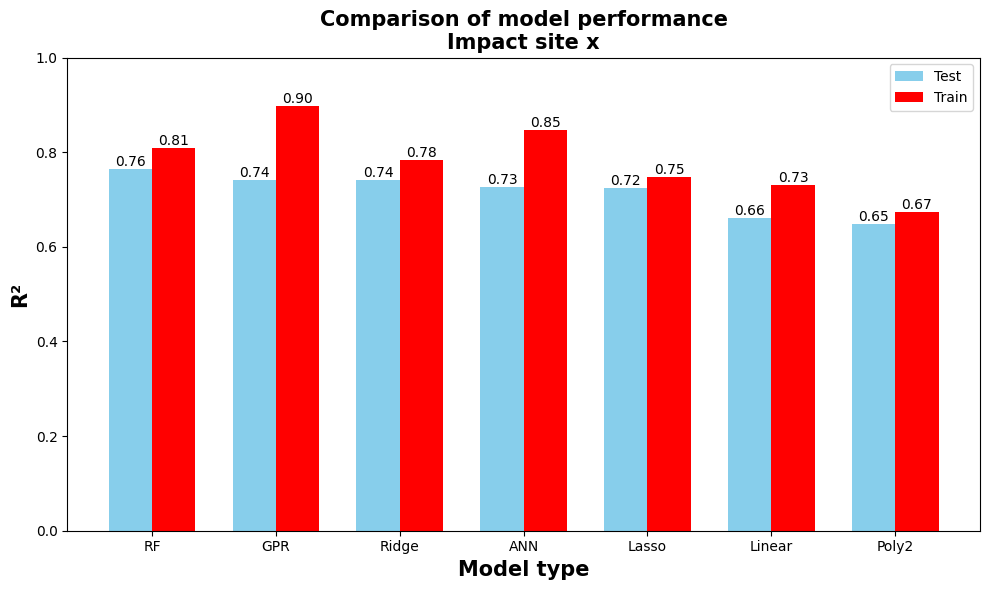

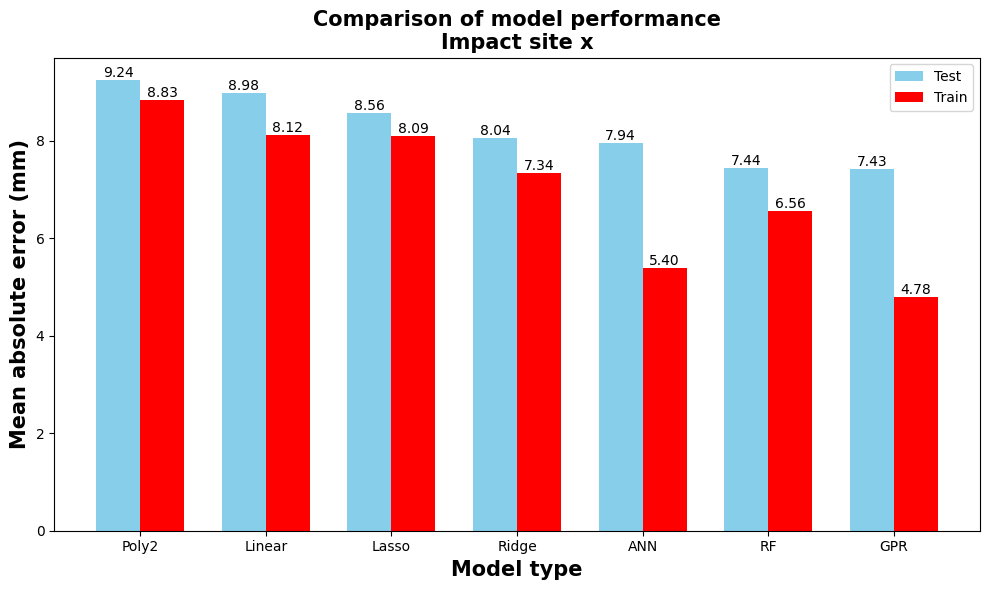

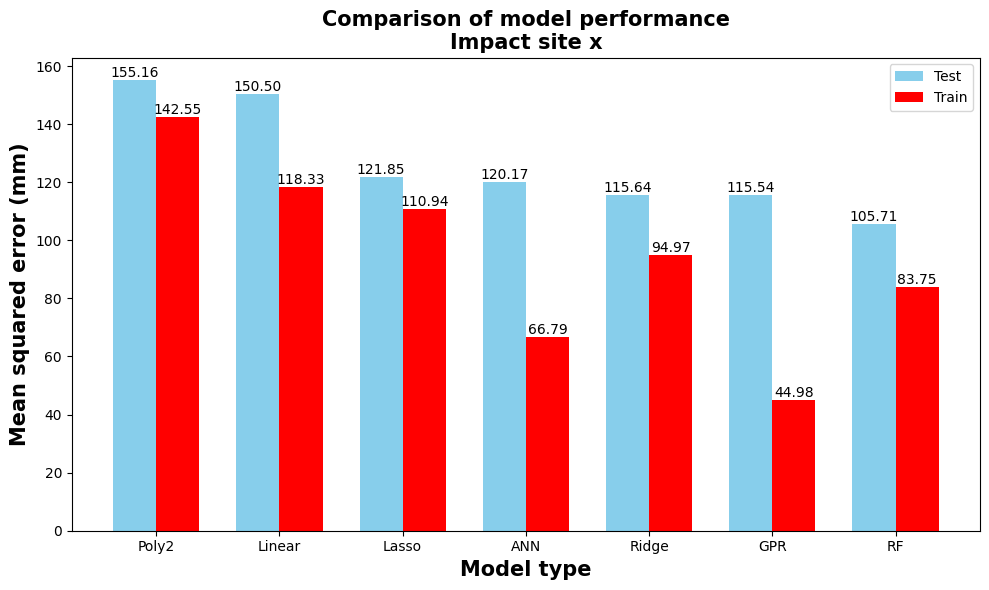

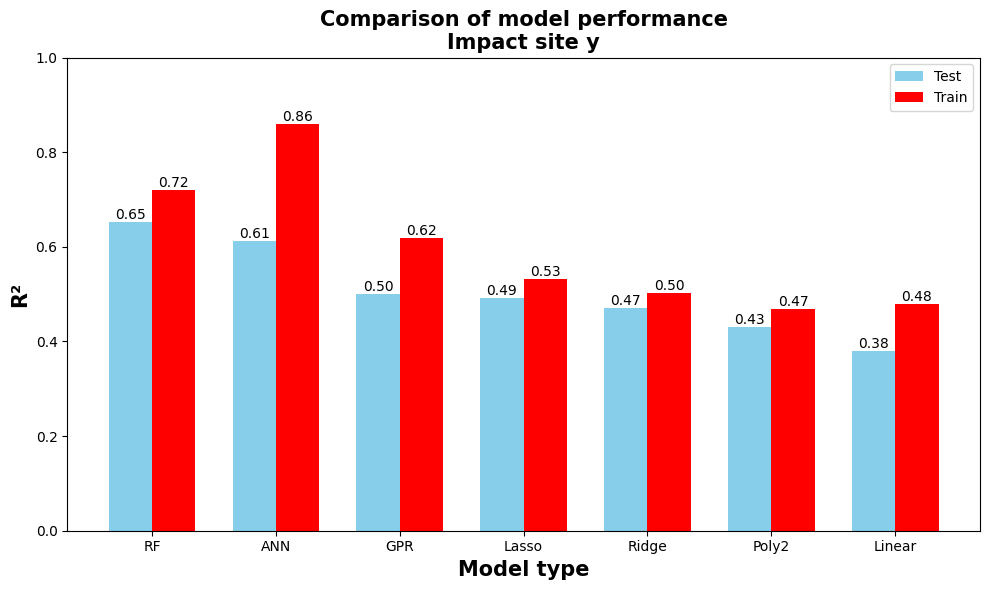

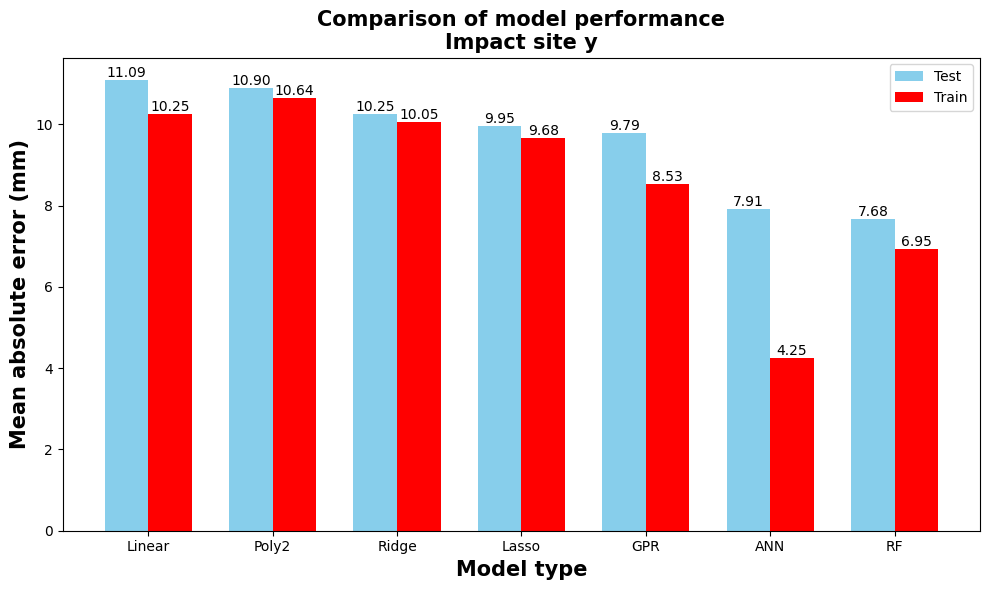

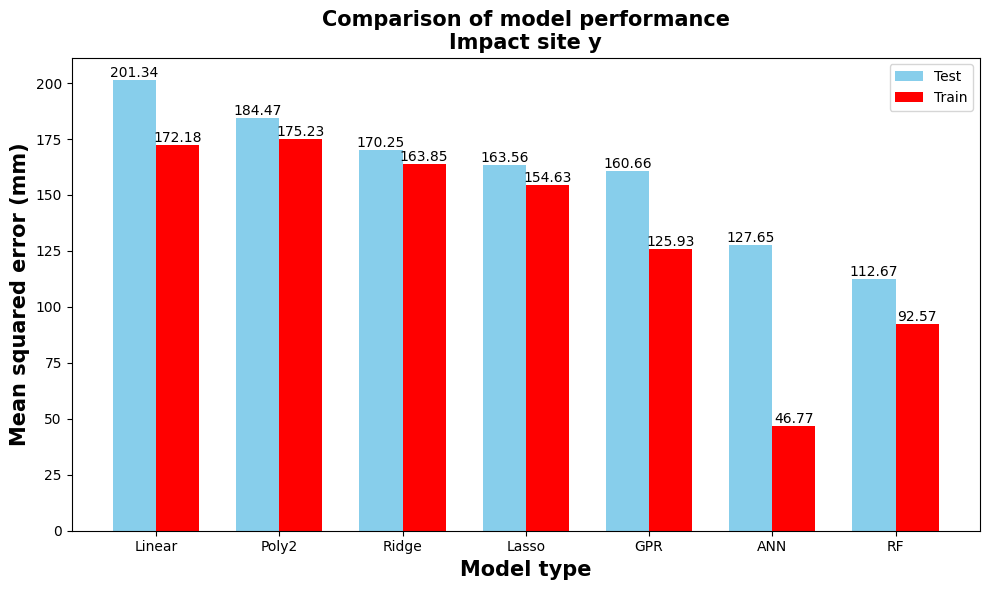

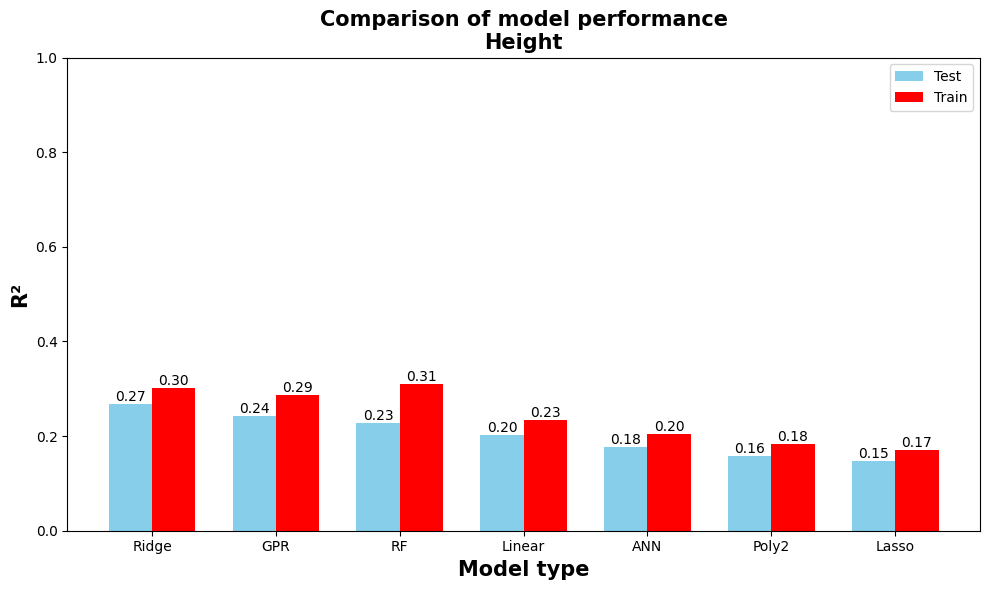

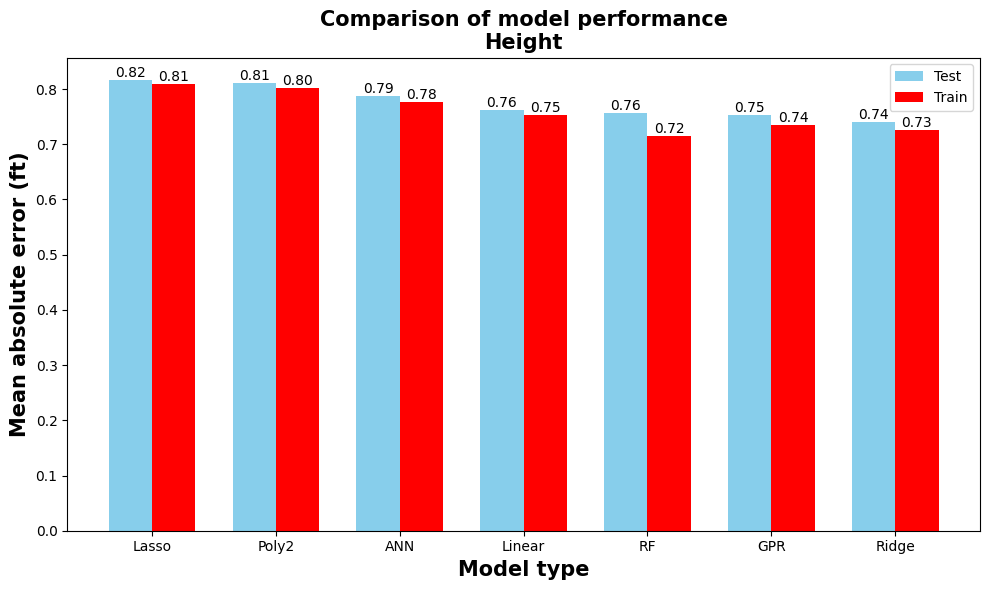

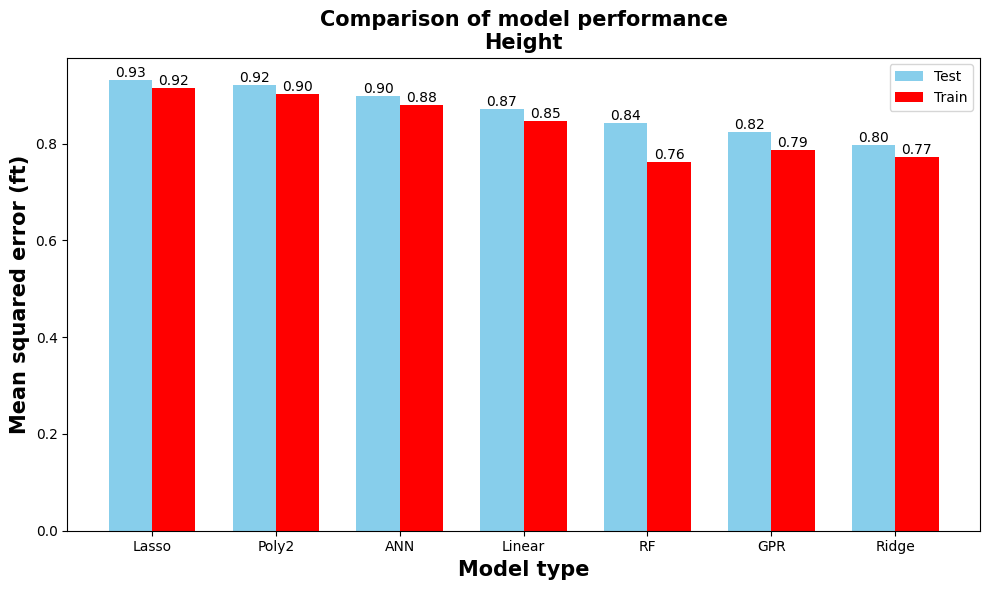

In [2]:
import sys
sys.path.append('/Users/jakehirst/Desktop/sfx/sfx_ML_code/sfx_ML/New_Models')

import matplotlib.pyplot as plt
import pandas as pd

labels_to_predict = ['impact site x', 'impact site y', 'height']
model_types = ['linear', 'ridge', 'lasso', 'poly2', 'ANN', 'GPR', 'RF']
results_folder = '/Volumes/Jake_ssd/Paper 1/Paper_1_results_WITH_feature_engineering/results'
# '/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/results/height/ANN/performances/test_performances.csv'

def plot_best_performances(test_results, train_results, label, metric):
    # Create lists of names and values
    names = list(test_results.keys())
    test_values = list(test_results.values())
    train_values = list(train_results.values())
    
    '''sorting from high to low'''
    # Combine names, test_values, and train_values for sorting
    combined = list(zip(names, test_values, train_values))
    # Sort the combined list by test_values in descending order
    sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
    # Unzip the sorted combined list
    names, test_values, train_values = zip(*sorted_combined)
    # Capitalize names properly
    names = [name.capitalize() if not name.isupper() else name for name in names]
    
    # Calculate bar width and indices
    n = len(test_results)
    bar_width = 0.35
    indices = range(n)

    # Create bar plot
    plt.figure(figsize=(10, 6))
    # Plot test values
    plt.bar(indices, test_values, width=bar_width, color='skyblue', label='Test')
    # Plot train values, offset by bar width
    plt.bar([i + bar_width for i in indices], train_values, width=bar_width, color='red', label='Train')

    # Add title and labels
    plt.title(f'Comparison of model performance\n{label.capitalize()}', fontweight='bold', fontsize=15)
    plt.xlabel('Model type', fontweight='bold', fontsize=15)
    
    if(metric == 'R\u00b2'):
        plt.ylabel(f'{metric}', fontweight='bold', fontsize=15)
        plt.ylim((0,1))
    elif(label == 'height'):
        plt.ylabel(f'{metric} (ft)', fontweight='bold', fontsize=15)
    else:
        plt.ylabel(f'{metric} (mm)', fontweight='bold', fontsize=15)

    # Add value labels and adjust x-ticks
    for i, (test, train) in enumerate(zip(test_values, train_values)):
        plt.text(i, test, f'{test:.2f}', ha='center', va='bottom')
        plt.text(i + bar_width, train, f'{train:.2f}', ha='center', va='bottom')
    plt.xticks([r + bar_width / 2 for r in indices], names)

    # Add legend
    plt.legend()

    # Tight layout and display plot
    plt.tight_layout()
    plt.savefig('model_performance_bar_plot.png', dpi=300)
    plt.show()
    return

def plot_best_performances_all_metrics(label, model_types, results_folder):
    maximum_number_of_features = 25
    
    r2_dict = {}
    mae_dict = {}
    mse_dict = {}
    
    train_r2_dict = {}
    train_mae_dict= {}
    train_mse_dict= {}

    for model_type in model_types:
        r2_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/test_performances.csv')
        r2_df = r2_df[r2_df['Unnamed: 0'] <= maximum_number_of_features]
        r2_df['mean'] = r2_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        mse_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/test_MSE.csv')
        mse_df = mse_df[mse_df['Unnamed: 0'] <= maximum_number_of_features]
        mse_df['mean'] = mse_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        mae_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/test_MAE.csv')
        mae_df = mae_df[mae_df['Unnamed: 0'] <= maximum_number_of_features]
        mae_df['mean'] = mae_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        train_r2_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/train_performances.csv')
        train_r2_df = train_r2_df[train_r2_df['Unnamed: 0'] <= maximum_number_of_features]
        train_r2_df['mean'] = train_r2_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        train_mse_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/train_MSE.csv')
        train_mse_df = train_mse_df[train_mse_df['Unnamed: 0'] <= maximum_number_of_features]
        train_mse_df['mean'] = train_mse_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        train_mae_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/train_MAE.csv')
        train_mae_df = train_mae_df[train_mae_df['Unnamed: 0'] <= maximum_number_of_features]
        train_mae_df['mean'] = train_mae_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)


        '''get the best r2 for this model, and the mae and mse that go along with that r2'''
        max_r2_idx = r2_df['mean'].idxmax()
        num_features = r2_df.loc[max_r2_idx]['Unnamed: 0']
        best_r2 = r2_df.loc[max_r2_idx]['mean']
        best_mse = mse_df.loc[max_r2_idx]['mean']
        best_mae = mae_df.loc[max_r2_idx]['mean']
        train_best_r2 = train_r2_df.loc[max_r2_idx]['mean']
        train_best_mse = train_mse_df.loc[max_r2_idx]['mean']
        train_best_mae = train_mae_df.loc[max_r2_idx]['mean']
        
        r2_dict[model_type] = best_r2
        mae_dict[model_type] = best_mae
        mse_dict[model_type] = best_mse
        
        train_r2_dict[model_type] = train_best_r2
        train_mae_dict[model_type] = train_best_mae
        train_mse_dict[model_type] = train_best_mse
        
    plot_best_performances(r2_dict, train_r2_dict, label, 'R\u00b2')
    plot_best_performances(mae_dict, train_mae_dict, label, 'Mean absolute error')
    plot_best_performances(mse_dict, train_mse_dict, label, 'Mean squared error')
        
        



for label in labels_to_predict:
    plot_best_performances_all_metrics(label, model_types, results_folder)
        


impact site x


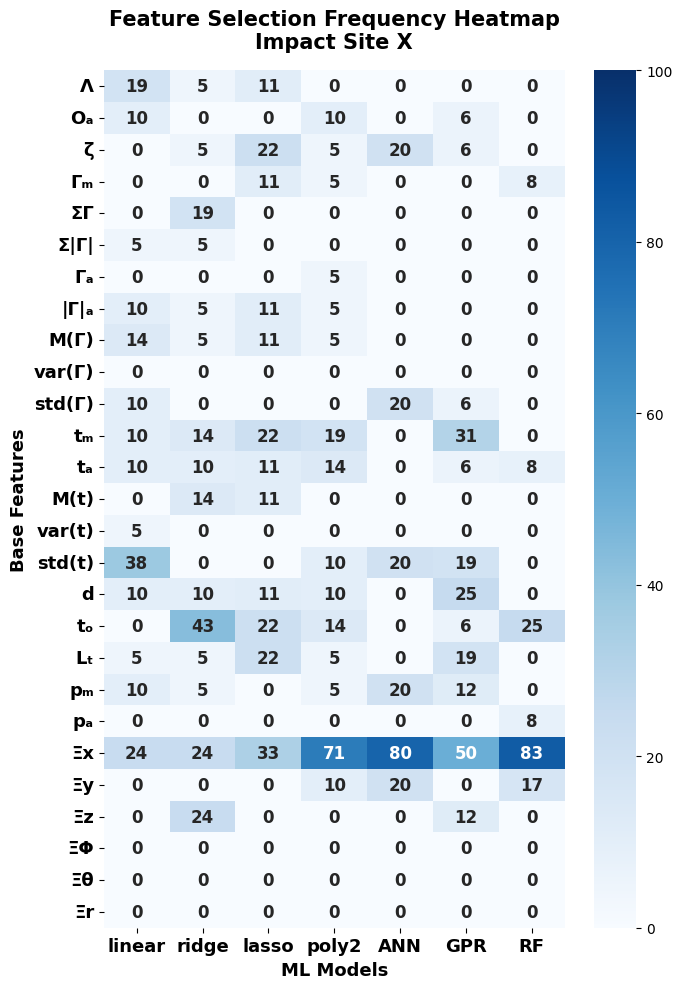

impact site y


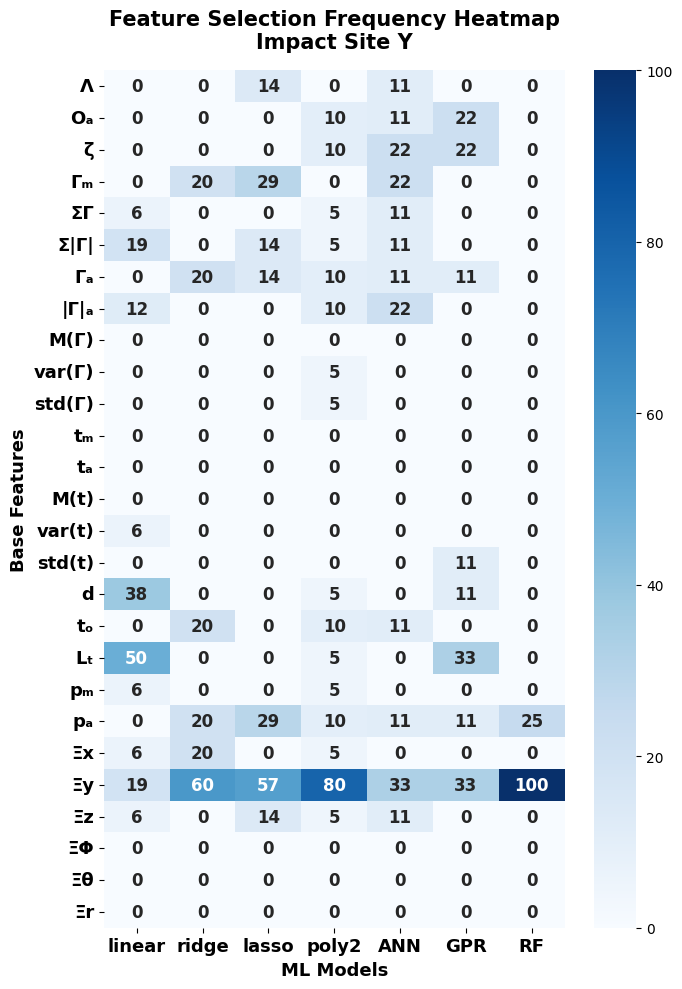

height


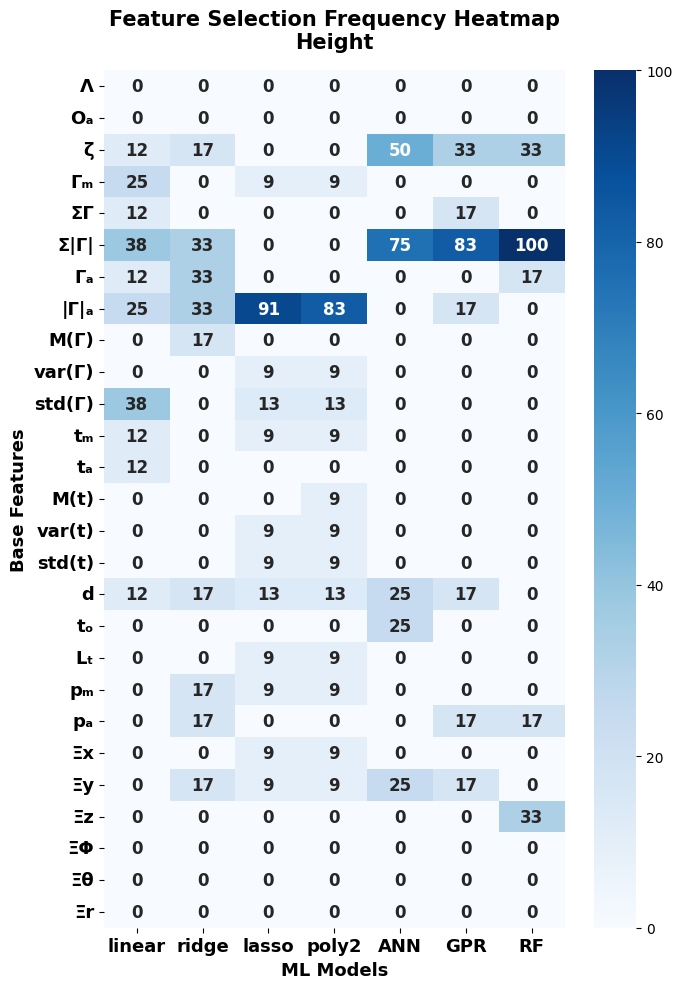

In [2]:
'''now we can see which features were used for all of the models'''

#NOTE each cell in the plots can be read as (for example 80) "80% of the features selected by this model have this feature"

import matplotlib.pyplot as plt
import pandas as pd
import ast 
import re
import seaborn as sns


FORMAL_LABELS = {'angle_btw': '\u039B',
                 'avg_ori': '\u039F\u2090',
                 'linearity': '\u03B6',
                 'max_kink': '\u0393\u2098',
                 'sum_kink': '\u03A3\u0393',
                 'abs_val_sum_kink': '\u03A3|\u0393|',
                 'mean_kink': '\u0393\u2090',
                 'abs_val_mean_kink': '|\u0393|\u2090',
                 'median_kink': 'M(\u0393)',
                 'var_kink': 'var(\u0393)',
                 'std_kink': 'std(\u0393)',
                 'max thickness': 't\u2098',
                 'mean thickness': 't\u2090',
                 'median_thickness': 'M(t)',
                 'var_thickness': 'var(t)',
                 'std_thickness': 'std(t)',
                 'dist btw frts': 'd',
                 'thickness_at_init': 't\u2092',
                 'crack len': 'L\u209c',
                 'max_prop_speed': 'p\u2098',
                 'avg_prop_speed': 'p\u2090',
                 'init x': '\u039Ex',
                 'init y': '\u039Ey',
                 'init z': '\u039Ez',
                 'init phi': '\u039E\u03A6',
                 'init theta': '\u039E\u03B8',
                 'init r': '\u039Er',
                 }


# for key in FORMAL_LABELS.keys():
#     print(f'\n{key} = {FORMAL_LABELS[key]}')
    
labels_to_predict = ['impact site x', 'impact site y', 'height']
model_types = ['linear', 'ridge', 'lasso', 'poly2', 'ANN', 'GPR', 'RF']
results_folder = '/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/results'

'''gets the features chosen for the best model in terms of test set performance'''
def get_best_features(labels_to_predict, model_types, results_folder):
    maximum_number_of_features = 25
    all_best_features = {}
    for label in labels_to_predict:
        all_best_features[label] = {}
        for model_type in model_types:
            r2_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/test_performances.csv')
            r2_df = r2_df[r2_df['Unnamed: 0'] <= maximum_number_of_features]
            r2_df['mean'] = r2_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)

            '''get the best r2 averaged across the test sets of 5fold cv for this model, and the features that go along with that r2'''
            max_r2_idx = r2_df['mean'].idxmax()
            best_features_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/features_kept.csv')
            best_features = ast.literal_eval(best_features_df.iloc[max_r2_idx]['features remaining'])
            all_best_features[label][model_type] = best_features
    return all_best_features


'''since there are feature interactions and transformations, 
we now need to find how many times the raw features are mentioned in the features selected.
This works with the best features selected from a single label output.'''
def extract_base_features(selected_features, base_features, model_types):
    feature_frequencies = {}
    zeros_dict = {feature: 0 for feature in base_features}

    for model in model_types:
        feature_frequencies[model] = zeros_dict.copy()
        for feature in selected_features[model]:
            for base_feature in base_features:
                # Check if the base feature is in the selected feature
                if re.search(r'\b' + re.escape(base_feature) + r'\b', feature):
                    feature_frequencies[model][base_feature] += 1
    return feature_frequencies



def plot_feature_heatmap_for_all_models(feature_frequencies, all_best_features, label, model_types):
    # # Convert the nested dictionary into a pandas DataFrame
    df = pd.DataFrame.from_dict(feature_frequencies, orient='index')

    df.columns = [FORMAL_LABELS.get(col, col) for col in df.columns]
    df = df.transpose()
    
    '''dividing by the number of features selected'''
    for model in model_types:
        num_feats = len(all_best_features[model])
        df[model] = df[model] / num_feats
    # Plotting the heatmap with formal labels for base features
    plt.figure(figsize=(7, 10))
    #COMMENT rounded to hundredths and multiplied df by 100 below to get percentages instead of decimals.
    heatmap = sns.heatmap((df*100).round(0).astype(int), annot=True, fmt="d", cmap='Blues', vmin=0, vmax=100,
                          annot_kws={"size": 12, "weight": "bold"})
    # Split the string into words
    words = label.split()
    # Capitalize the first letter of each word and join them back into a string
    capitalized_label = ' '.join([word.capitalize() for word in words])
    heatmap.set_title(f'Feature Selection Frequency Heatmap\n{capitalized_label}', fontdict={'fontsize':15, 'fontweight':'bold'}, pad=16)
    # heatmap.set_title(f'Feature Selection Frequency Heatmap\n{label.capitalize()}', fontdict={'fontsize':15, 'fontweight':'bold'}, pad=16)
    plt.ylabel('Base Features', fontdict={'fontsize':13, 'fontweight':'bold'} )
    plt.xlabel('ML Models', fontdict={'fontsize':13, 'fontweight':'bold'})

    # Improve the appearance of the labels
    plt.xticks(rotation=0, ha='center', fontsize=13,fontweight='bold')
    plt.yticks(rotation=0, fontsize=13, fontweight='bold')
    plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

    plt.show()
    
    
    return
        


all_best_features = get_best_features(labels_to_predict, model_types, results_folder)

for label in labels_to_predict:
    print(label)
    feature_frequencies = extract_base_features(all_best_features[label], list(FORMAL_LABELS.keys()), model_types)
    plot_feature_heatmap_for_all_models(feature_frequencies, all_best_features[label], label, model_types)

In [55]:
import pandas as pd

# Defining the data for the table as seen in the image provided by the user.
data = {
    "Item": [
        "Demographic Variables for Head",
        "Male",
        "Age",
        "Age Squared",
        "Head's Education",
        "Completed primary or incomplete secondary",
        "Completed secondary or higher",
        "Completed secondary",
        "Higher",
        "Unknown",
        "Other",
        "Household has electricity",
        "Residence in a small city",
        "Residence in a capital or large city"
    ],
    "Estimated": [
        "",  # Placeholder for the category
        85,
        85,
        85,
        "",  # Placeholder for the category
        76,
        60,
        19,
        20,
        12,
        "",  # Placeholder for the category
        61,
        71,
        82
    ],
    "Positive and Significant": [
        "",  # Placeholder for the category
        74,
        85,
        0,
        "",  # Placeholder for the category
        76,
        60,
        19,
        20,
        12,
        "",  # Placeholder for the category
        61,
        60,
        74
    ],
    "Negative and Significant": [
        "",  # Placeholder for the category
        11,
        0,
        85,
        "",  # Placeholder for the category
        0,
        0,
        0,
        0,
        0,
        "",  # Placeholder for the category
        0,
        11,
        7
    ]
}


def main():
    print("Hello World!")
    # Creating a DataFrame from the data
    df = pd.DataFrame(data)

    # Adjusting the style to simulate the look of the table in the image
    styles = [
        dict(selector="th", props=[("font-size", "10pt"), ("text-align", "center")]),
        dict(selector="td", props=[("text-align", "center")]),
        dict(selector="caption", props=[
            ("caption-side", "bottom"), ("font-size", "8pt")])
    ]
    styled_df = df.style.set_table_styles(styles).hide_index().set_caption("Table 4. Summary of \(y\), the Effects of Determinants \(X\) on the Living-Standards Factor")

    # Converting DataFrame to HTML to display it
    html = styled_df.render()

    # Saving the styled DataFrame to an HTML file
    html_file_path = '/Users/jakehirst/Desktop/writing class/paper_1_figures/result_styled_table.html'
    with open(html_file_path, 'w') as f:
        f.write(html)

    html_file_path
    
    
if __name__ == "__main__":
    main()

Hello World!


/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/2233725648.py:84: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled_df = df.style.set_table_styles(styles).hide_index().set_caption("Table 4. Summary of \(y\), the Effects of Determinants \(X\) on the Living-Standards Factor")
/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/2233725648.py:87: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()


****

In [92]:
import pandas as pd
import os

def format_float(val):
    """Format float removing unnecessary zeros."""
    return "{:.2f}".format(val)

# def highlight_row(s, row_to_highlight, color):
#     """Highlight a row in the DataFrame."""
#     return ['background-color: {}'.format(color) if row == row_to_highlight else '' for row in s]

def highlight_row(row, row_to_highlight, color):
    """Highlight a row in the DataFrame."""
    return [f'background-color: {color}' if row_to_highlight in row.name else '' for _ in row]

def get_best_performances_all_metrics(label, model_types, results_folder):
    maximum_number_of_features = 25
    
    r2_dict = {}
    mae_dict = {}
    mse_dict = {}
    
    train_r2_dict = {}
    train_mae_dict= {}
    train_mse_dict= {}

    for model_type in model_types:
        r2_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/test_performances.csv')
        r2_df = r2_df[r2_df['Unnamed: 0'] <= maximum_number_of_features]
        r2_df['mean'] = r2_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        mse_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/test_MSE.csv')
        mse_df = mse_df[mse_df['Unnamed: 0'] <= maximum_number_of_features]
        mse_df['mean'] = mse_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        mae_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/test_MAE.csv')
        mae_df = mae_df[mae_df['Unnamed: 0'] <= maximum_number_of_features]
        mae_df['mean'] = mae_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        train_r2_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/train_performances.csv')
        train_r2_df = train_r2_df[train_r2_df['Unnamed: 0'] <= maximum_number_of_features]
        train_r2_df['mean'] = train_r2_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        train_mse_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/train_MSE.csv')
        train_mse_df = train_mse_df[train_mse_df['Unnamed: 0'] <= maximum_number_of_features]
        train_mse_df['mean'] = train_mse_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)
        
        train_mae_df = pd.read_csv(results_folder + f'/{label}/{model_type}/performances/train_MAE.csv')
        train_mae_df = train_mae_df[train_mae_df['Unnamed: 0'] <= maximum_number_of_features]
        train_mae_df['mean'] = train_mae_df[['fold0', 'fold1', 'fold2', 'fold3', 'fold4']].mean(axis=1)


        '''get the best r2 for this model, and the mae and mse that go along with that r2'''
        max_r2_idx = r2_df['mean'].idxmax()
        num_features = r2_df.loc[max_r2_idx]['Unnamed: 0']
        best_r2 = r2_df.loc[max_r2_idx]['mean']
        best_mse = mse_df.loc[max_r2_idx]['mean']
        best_mae = mae_df.loc[max_r2_idx]['mean']
        train_best_r2 = train_r2_df.loc[max_r2_idx]['mean']
        train_best_mse = train_mse_df.loc[max_r2_idx]['mean']
        train_best_mae = train_mae_df.loc[max_r2_idx]['mean']
        
        
        
        r2_dict[model_type] = best_r2.round(2)
        mae_dict[model_type] = best_mae.round(2)
        mse_dict[model_type] = best_mse.round(2)
        
        train_r2_dict[model_type] = train_best_r2.round(2)
        train_mae_dict[model_type] = train_best_mae.round(2)
        train_mse_dict[model_type] = train_best_mse.round(2)
        
    # Now we create a pandas DataFrame from these dictionaries
    results_df = pd.DataFrame(list(r2_dict.items()), columns=['Model type', 'Test R\u00B2'])
    results_df['Train R\u00B2'] = results_df['Model type'].map(train_r2_dict)
    if(label == 'height'):
        results_df[' Test MAE (ft) '] = results_df['Model type'].map(mae_dict)
        results_df[' Train MAE (ft) '] = results_df['Model type'].map(train_mae_dict)
    else: 
        results_df['Test MAE (mm)'] = results_df['Model type'].map(mae_dict)
        results_df['Train MAE (mm)'] = results_df['Model type'].map(train_mae_dict)
    return results_df


def vertical():
    labels_to_predict = ['impact site x', 'impact site y', 'height']
    combined_html = ""
    highlight_color = 'yellow'

    for label in labels_to_predict:
        results_df = get_best_performances_all_metrics(label, model_types, results_folder)

        # Apply formatting to float columns to remove trailing zeros
        results_df = results_df.applymap(lambda x: format_float(x) if isinstance(x, float) else x)
        
        # # Highlight specific rows based on the model type
        # if label == 'impact site x' or label == 'impact site y':
        #     # Highlight the 'RF' row in yellow
        #     results_df.index = results_df['Model type']
        #     results_df = results_df.style.apply(lambda s: highlight_row(s, 'RF', highlight_color), axis=1)
        # elif label == 'height':
        #     # Change the units for Test MAE and Train MAE to feet
        #     results_df.rename(columns={'Test MAE (mm)': 'Test MAE (ft)', 'Train MAE (mm)': 'Train MAE (ft)'}, inplace=True)
        #     # Highlight the 'ridge' row in yellow
        #     results_df.index = results_df['Model type']
        #     results_df = results_df.style.apply(lambda s: highlight_row(s, 'ridge', highlight_color), axis=1)

        styles = [
            # Style for headers and cells
            dict(selector="th", props=[("font-size", "12pt"), ("text-align", "center"), ("padding", "10px")]),
            dict(selector="td", props=[("text-align", "center"), ("padding", "10px")]),
            # Style for caption
            dict(selector="caption", props=[
                ("caption-side", "top"),
                ("font-size", "14pt"),
                ("font-weight", "bold"),
                ("text-decoration", "underline")
            ])
        ]
        results_styled_df = results_df.style.set_table_styles(styles).hide_index().set_caption(f"Results Summary for {label.capitalize()}")

        # Converting the styled DataFrame to HTML
        results_html = results_styled_df.render()
        
        # Add a horizontal bar except for the first table
        if combined_html:
            combined_html += '<hr>'
        
        combined_html += results_html

    # Define the HTML file path
    combined_html_file_path = f'/Users/jakehirst/Desktop/writing class/paper_1_figures/result_styled_table_COMBINED_VERTICAL.html'

    # Saving the combined HTML to a file
    with open(combined_html_file_path, 'w') as f:
        f.write(combined_html)

    # Check if the file exists at the given path
    file_exists = os.path.isfile(combined_html_file_path)

    print(file_exists, combined_html_file_path)




def horizontal():
    labels_to_predict = ['impact site x', 'impact site y', 'height']
    table_html_list = []
    highlight_color = 'yellow'

    for i, label in enumerate(labels_to_predict):
        results_df = get_best_performances_all_metrics(label, model_types, results_folder)

        # Apply formatting to float columns to remove trailing zeros
        results_df = results_df.applymap(lambda x: format_float(x) if isinstance(x, float) else x)

        # Highlight specific rows based on the model type
        if label == 'impact site x' or label == 'impact site y':
            # Highlight the 'RF' row in yellow
            results_df.index = results_df['Model type']
            results_df = results_df.style.apply(lambda s: highlight_row(s, 'RF', highlight_color), axis=1)
        elif label == 'height':
            # Change the units for Test MAE and Train MAE to feet
            results_df.rename(columns={'Test MAE (mm)': 'Test MAE (ft)', 'Train MAE (mm)': 'Train MAE (ft)'}, inplace=True)
            # Highlight the 'ridge' row in yellow
            results_df.index = results_df['Model type']
            results_df = results_df.style.apply(lambda s: highlight_row(s, 'ridge', highlight_color), axis=1)

        # Style for headers, cells, and caption
        styles = [
            dict(selector="th", props=[("font-size", "12pt"), ("text-align", "center"), ("padding", "10px")]),
            dict(selector="td", props=[("text-align", "center"), ("padding", "10px")]),
            dict(selector="caption", props=[
                ("caption-side", "top"),
                ("font-size", "14pt"),
                ("font-weight", "bold"),
                ("text-decoration", "underline")
            ]),
        ]
        
        # Set additional styles for the table
        results_df = results_df.set_table_styles(styles).hide_index().set_caption(f"Results Summary for {label.capitalize()}")

        # Convert the styled DataFrame to HTML
        table_html = results_df.render()
        table_html_list.append(table_html)

    # Define a flex container style
    flex_container_style = """
    <style>
        .flex-container {
            display: flex;
            flex-direction: row;
            justify-content: space-between;
        }
        .flex-container > div {
            margin: 10px;
            padding: 10px;
            border: 1px solid #ccc;
        }
    </style>
    """

    # Wrap the tables in divs inside a flex container
    combined_html = f"{flex_container_style}<div class='flex-container'>{'' .join(table_html_list)}</div>"

    # Define the HTML file path
    combined_html_file_path = f'/Users/jakehirst/Desktop/writing class/paper_1_figures/result_styled_table_COMBINED_HORIZONTAL.html'

    # Saving the combined HTML to a file
    with open(combined_html_file_path, 'w') as f:
        f.write(combined_html)

    # Check if the file exists at the given path
    file_exists = os.path.isfile(combined_html_file_path)

    print(file_exists, combined_html_file_path)



if __name__ == "__main__":
    vertical()
    horizontal()




/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:120: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  results_styled_df = results_df.style.set_table_styles(styles).hide_index().set_caption(f"Results Summary for {label.capitalize()}")
/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:123: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  results_html = results_styled_df.render()
/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:120: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  results_styled_df = results_df.style.set_table_styles(styles).hide_index().set_caption(f"Results Summary for {label.capitalize()}")
/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:123: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  results_html = results_styled_df.render(

True /Users/jakehirst/Desktop/writing class/paper_1_figures/result_styled_table_COMBINED_VERTICAL.html
True /Users/jakehirst/Desktop/writing class/paper_1_figures/result_styled_table_COMBINED_HORIZONTAL.html


/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:182: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  results_df = results_df.set_table_styles(styles).hide_index().set_caption(f"Results Summary for {label.capitalize()}")
/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:185: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  table_html = results_df.render()
/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:182: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  results_df = results_df.set_table_styles(styles).hide_index().set_caption(f"Results Summary for {label.capitalize()}")
/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_78815/1744221299.py:185: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  table_html = results_df.render()
